In [ ]:
# PyQT5로 그리드 레이아웃 만들기
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( QWidget, QApplication, QLabel, QLineEdit, QTextEdit, QGridLayout )
import sys

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # 초기화면 구성
        grid = QGridLayout() # 내가 사용할 grid layout 생성
        self.setLayout(grid) # 내가 만든 grid layout을 제일 바깥 layout으로 설정

        grid.addWidget(QLabel("Title : "), 0, 0)
        grid.addWidget(QLabel("Author : "), 1, 0)
        grid.addWidget(QLabel("Review : "), 2, 0)

        grid.addWidget(QLineEdit(), 0, 1)
        grid.addWidget(QLineEdit(), 1, 1)
        grid.addWidget(QTextEdit(), 2, 1)

        self.setWindowTitle("grid layout")
        self.setGeometry(300, 300, 300, 200)

        self.setStyleSheet("""
            QLabel {
                color:#0000FF;
            }
            QLineEdit {
                font-size: 14px;
                border: 1px solid #FF0000;
            }
        """)
        
        self.show()

if __name__ == "__main__": # 내가 직접 실행한다면
    app = QApplication.instance()
    if app is None:
        app = QApplication(sys.argv)
    exam = MyApp()
    sys.exit(app.exec_())

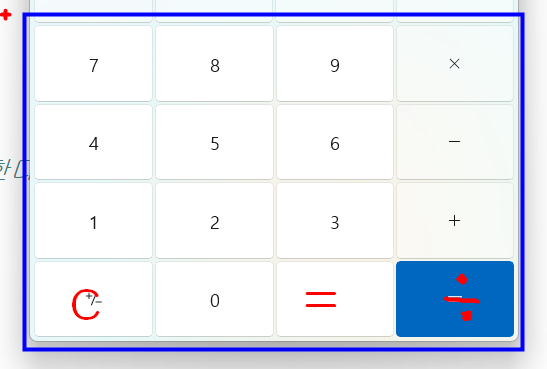

In [ ]:
# 어제 혹시 설치 안 하신분들
!pip install pyinstaller

In [ ]:
# gui 자동화??
!pip install pyautogui

In [18]:
import pyautogui as pag
import time
# 마우스, 키보드 제어
# pag.moveTo(500, 500, duration=2) # 고정된 pixel 위치로 2초동안 이동
# 키보드
time.sleep(3)
pag.hotkey("win", "r")
time.sleep(0.1)
pag.write("notepad")
pag.press("enter") # pag.KEYBOARD_KEYS 안에 있는 문구를 넣으면 동작!!
time.sleep(0.5)
pag.typewrite(list("I Love You!!"), interval=0.1)
for _ in range(20):
    pag.hotkey("ctrl", "=")
    time.sleep(0.025)

In [11]:
print(pag.KEYBOARD_KEYS)

['\t', '\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'accept', 'add', 'alt', 'altleft', 'altright', 'apps', 'backspace', 'browserback', 'browserfavorites', 'browserforward', 'browserhome', 'browserrefresh', 'browsersearch', 'browserstop', 'capslock', 'clear', 'convert', 'ctrl', 'ctrlleft', 'ctrlright', 'decimal', 'del', 'delete', 'divide', 'down', 'end', 'enter', 'esc', 'escape', 'execute', 'f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2', 'f20', 'f21', 'f22', 'f23', 'f24', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'final', 'fn', 'hanguel', 'hangul', 'hanja', 'help', 'home', 'insert', 'junja', 'kana', 'kanji', 'launchapp1', 'launchapp2', 'launchmai

In [27]:
# 설치 하셨던 분들은
!pyinstaller --onefile -w my_cal.py

# 끝나신 분들은 workspace -> dist 폴더 내 my_cal.exe

28 DEPRECATION: Running PyInstaller as admin is not necessary nor sensible. Run PyInstaller from a non-administrator terminal. PyInstaller 7.0 will block this.
321 INFO: PyInstaller: 6.15.0, contrib hooks: 2025.8
321 INFO: Python: 3.9.23 (conda)
328 INFO: Platform: Windows-10-10.0.26100-SP0
328 INFO: Python environment: C:\ProgramData\anaconda3\envs\myenv
328 INFO: wrote C:\Users\Intel Master\Desktop\workspace\my_cal.spec
339 INFO: Module search paths (PYTHONPATH):
['C:\\ProgramData\\anaconda3\\envs\\myenv\\Scripts\\pyinstaller.exe',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\python39.zip',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\DLLs',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\lib',
 'C:\\ProgramData\\anaconda3\\envs\\myenv',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\lib\\site-packages',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\lib\\site-packages\\win32',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\anaconda3\\envs\\myenv\\lib\\

In [25]:
# 계산기 프로그램 
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( QWidget, QApplication, QLabel, QLineEdit,
                                QTextEdit, QGridLayout, QPushButton )
import sys

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # 초기화면 구성
        grid = QGridLayout()
        self.result = ""

        value_list = ["7", "8", "9", "*",
                     "4", "5", "6", "-",
                     "1", "2", "3", "+",
                     "C", "0", "=", "/"]
        
        button_list = []
        for i in range(16):
            button = QPushButton()
            button.clicked.connect(self.button_cliked)
            button_list.append(button)

        for i, button in enumerate(button_list):
            button.setText(value_list[i])

        self.ql_result = QLabel("0", alignment=Qt.AlignRight)
        grid.addWidget(self.ql_result, 0, 0, 1, 4)
        # addWidget (행, 열, 차지할 행, 차지할 열)
        count = 0
        for i in range(1, 5):
            for j in range(4):
                grid.addWidget(button_list[count], i, j)
                count += 1

        self.setLayout(grid)
        self.setGeometry(300, 300, 300, 200)

        self.setStyleSheet("""
            /* 전체 윈도우 스타일 */
            QWidget {
                background-color: #2E2E2E; /* 어두운 배경색 */
            }

            /* 결과창 (QLabel) 스타일 */
            QLabel {
                font-size: 48px;
                color: #FFFFFF; /* 흰색 텍스트 */
                background-color: #2E2E2E;
                border: none;
                padding: 10px;
            }

            /* 모든 버튼 (QPushButton)의 기본 스타일 */
            QPushButton {
                font-size: 20px;
                font-weight: bold;
                color: #FFFFFF;
                background-color: #505050; /* 중간 회색 */
                border: none;
                border-radius: 30px; /* 둥근 모서리 */
                min-height: 60px; /* 최소 높이 */
                min-width: 60px; /* 최소 너비 */
            }
            QPushButton:hover {
                background-color: #6a6a6a; /* 마우스 올렸을 때 */
            }
            QPushButton:pressed {
                background-color: #7f7f7f; /* 클릭했을 때 */
            }

            /* 연산자 버튼(*, -, +, /) 스타일 */
            QPushButton#operator {
                background-color: #FF9500; /* 주황색 */
            }
            QPushButton#operator:hover {
                background-color: #ffab3c;
            }
            QPushButton#operator:pressed {
                background-color: #ffc476;
            }

            /* C (Clear) 버튼 스타일 */
            QPushButton#clear {
                background-color: #D4D4D2; /* 밝은 회색 */
                color: #000000; /* 검은색 텍스트 */
            }
            QPushButton#clear:hover {
                background-color: #e2e2e1;
            }
            QPushButton#clear:pressed {
                background-color: #f1f1f1;
            }
        """)

        self.show()

    def button_cliked(self):
        # __init__, initUI()와 같은 level
        # ~~~~~~~~
        # 버튼 3을 눌렀다 -> QLabel의 text가 3이 되게
        # button_cliked 나를 부른 사람이 누구야?
        button = self.sender() # 버튼 3이 누르면 3버튼
        key = button.text()

        if key == "=":
            cal_result = eval(self.result)
            self.ql_result.setText(str(cal_result))
            self.result = ""
        elif key == "C":
            self.result = ""
            self.ql_result.setText("0")
        else:
            self.result += key
            self.ql_result.setText(self.result)
        
if __name__ == "__main__": # 내가 직접 실행한다면
    app = QApplication.instance()
    if app is None:
        app = QApplication(sys.argv)
    exam = MyApp()
    sys.exit(app.exec_())

SystemExit: 0

In [76]:
# 1 to 9 게임 만들기
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( QWidget, QApplication, QLabel, 
                            QLineEdit, QTextEdit, QGridLayout,
                            QVBoxLayout, QPushButton)
from PyQt5.QtGui import QFont
import sys
import time
import random

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.answer = 1 # 내가 눌러야 할 숫자
        self.setWindowTitle("1 to 9 GAME")
        self.setGeometry(300, 300, 300, 400)
        
        vbox = QVBoxLayout()
        self.ql_result = QLabel("1 to 9", alignment=Qt.AlignCenter)
        self.ql_result.setFont(QFont("", 24))
        
        self.button_start = QPushButton("GAME START")
        self.button_start.setFixedHeight(50)
        self.button_start.clicked.connect(self.start_game)

        self.grid = QGridLayout()

        self.button_list = []
        for i in range(9):
            button = QPushButton()
            button.setMinimumSize(90, 60)
            button.setStyleSheet("font-size:20px;")
            button.setEnabled(False) # 처음에 못 누르게!!
            self.button_list.append(button)

        count = 0
        for i in range(3):
            for j in range(3):
                self.grid.addWidget(self.button_list[count], i, j)
                count += 1

        vbox.addWidget(self.ql_result)
        vbox.addWidget(self.button_start)
        
        vbox.addLayout(self.grid)

        self.setLayout(vbox)
        self.show()

    def start_game(self):
        self.button_start.setEnabled(False)

        # 1 ~ 9까지 랜덤하게 들어 있는 자료
        number_list = list(range(1, 10))
        import random
        random.shuffle(number_list)
        
        for i in range(9):
            self.button_list[i].setEnabled(True)
            self.button_list[i].setText(f"{str(number_list[i])}")
            self.button_list[i].clicked.connect(self.button_cliked)
        self.start_time = time.perf_counter() # 시작 시각 입력

    def button_cliked(self):
        button = self.sender()
        if int(button.text()) == self.answer:
            button.setEnabled(False)
            button.setText("")
            self.answer += 1

            if self.answer == 10:
                self.end_time = time.perf_counter() # 종료 시각 입력

                record_time = self.end_time - self.start_time
                self.ql_result.setText(f"{record_time:.2f}sec")

                self.button_start.setEnabled(True)
                self.answer = 1

if __name__ == "__main__": # 내가 직접 실행한다면
    app = QApplication.instance()
    if app is None:
        app = QApplication(sys.argv)
    exam = MyApp()
    sys.exit(app.exec_())



SystemExit: 0

In [89]:
# 1 to 9 게임 만들기
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( QWidget, QApplication, QLabel, 
                            QLineEdit, QTextEdit, QGridLayout,
                            QVBoxLayout, QPushButton)
from PyQt5.QtGui import QFont
import sys
import time
import random

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.n = 5
        self.n2 = pow(self.n, 2)
        self.initUI()

    def initUI(self):
        self.answer = 1 # 내가 눌러야 할 숫자
        self.setWindowTitle(f"1 to {self.n2} GAME")
        self.setGeometry(300, 300, 300, 400)
        
        vbox = QVBoxLayout()
        self.ql_result = QLabel(f"1 to {self.n2}", alignment=Qt.AlignCenter)
        self.ql_result.setFont(QFont("", 24))
        
        self.button_start = QPushButton("GAME START")
        self.button_start.setFixedHeight(50)
        self.button_start.clicked.connect(self.start_game)

        self.grid = QGridLayout()

        self.button_list = []
        for i in range(self.n2):
            button = QPushButton()
            button.setMinimumSize(90, 60)
            button.setStyleSheet("font-size:20px;")
            button.setEnabled(False) # 처음에 못 누르게!!
            self.button_list.append(button)

        count = 0
        for i in range(self.n):
            for j in range(self.n):
                self.grid.addWidget(self.button_list[count], i, j)
                count += 1

        vbox.addWidget(self.ql_result)
        vbox.addWidget(self.button_start)
        
        vbox.addLayout(self.grid)

        self.setLayout(vbox)
        self.show()

    def start_game(self):
        self.button_start.setEnabled(False)

        # 1 ~ 9까지 랜덤하게 들어 있는 자료
        number_list = list(range(1, self.n2 + 1))
        import random
        random.shuffle(number_list)
        
        for i in range(self.n2):
            self.button_list[i].setEnabled(True)
            self.button_list[i].setText(f"{str(number_list[i])}")
            self.button_list[i].clicked.connect(self.button_cliked)
        self.start_time = time.perf_counter() # 시작 시각 입력

    def button_cliked(self):
        button = self.sender()
        if int(button.text()) == self.answer:
            button.setEnabled(False)
            button.setText("")
            self.answer += 1

            if self.answer == self.n2 + 1:
                self.end_time = time.perf_counter() # 종료 시각 입력

                record_time = self.end_time - self.start_time
                self.ql_result.setText(f"{record_time:.2f}sec")

                self.button_start.setEnabled(True)
                self.answer = 1

if __name__ == "__main__": # 내가 직접 실행한다면
    app = QApplication.instance()
    if app is None:
        app = QApplication(sys.argv)
    exam = MyApp()
    sys.exit(app.exec_())





SystemExit: 0

In [90]:
# 1 to N^2 게임 만들기 (프로 디자이너 버전)
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( QWidget, QApplication, QLabel, 
                                QGridLayout, QVBoxLayout, QPushButton)
from PyQt5.QtGui import QFont
import sys
import time
import random

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.n = 5  # 게임 판 크기 (5x5)
        self.n2 = pow(self.n, 2)
        self.initUI()

    def initUI(self):
        self.answer = 1  # 내가 눌러야 할 숫자
        self.setWindowTitle(f"1 to {self.n2} GAME")
        self.setGeometry(300, 300, 500, 600)
        
        # --- 레이아웃 설정 ---
        vbox = QVBoxLayout()
        vbox.setContentsMargins(20, 20, 20, 20) # 윈도우 여백
        vbox.setSpacing(15) # 위젯 간 간격

        # --- 결과 표시 라벨 ---
        self.ql_result = QLabel(f"1 to {self.n2}", alignment=Qt.AlignCenter)
        self.ql_result.setFont(QFont("Arial", 28, QFont.Bold))

        # --- 게임 시작 버튼 ---
        self.button_start = QPushButton("GAME START")
        self.button_start.setFixedHeight(60)
        self.button_start.clicked.connect(self.start_game)

        # --- 숫자 버튼 그리드 ---
        self.grid = QGridLayout()
        self.grid.setSpacing(10) # 버튼 간 간격

        self.button_list = []
        for i in range(self.n2):
            button = QPushButton()
            button.setMinimumSize(90, 90) # 버튼 최소 크기 (정사각형)
            button.setEnabled(False) # 처음에 못 누르게
            self.button_list.append(button)

        count = 0
        for i in range(self.n):
            for j in range(self.n):
                self.grid.addWidget(self.button_list[count], i, j)
                count += 1

        # --- 최종 레이아웃 조합 ---
        vbox.addWidget(self.ql_result)
        vbox.addWidget(self.button_start)
        vbox.addLayout(self.grid)

        self.setLayout(vbox)
        self.apply_styles() # 스타일시트 적용 함수 호출
        self.show()

    def apply_styles(self):
        """CSS와 유사한 QSS를 사용하여 전체적인 디자인을 적용합니다."""
        stylesheet = """
            /* 윈도우 전체 배경 */
            QWidget {
                background-color: #2d3436;
            }

            /* 결과 및 타이머 라벨 */
            QLabel {
                color: #dfe6e9; /* 밝은 회색 텍스트 */
                padding: 10px;
            }

            /* 모든 버튼의 기본 스타일 */
            QPushButton {
                background-color: #636e72;
                color: #dfe6e9;
                font-size: 24px;
                font-weight: bold;
                border: none;
                border-radius: 8px; /* 버튼 모서리를 둥글게 */
            }

            /* 마우스를 올렸을 때 버튼 스타일 */
            QPushButton:hover {
                background-color: #b2bec3;
            }
            
            /* 클릭했을 때 버튼 스타일 */
            QPushButton:pressed {
                background-color: #00b894; /* 포인트 컬러 */
            }

            /* 비활성화된 버튼 스타일 */
            QPushButton:disabled {
                background-color: #2d3436; /* 배경과 동일하게 */
                color: #636e72;
            }

            /* 시작 버튼 전용 스타일 */
            #StartButton {
                background-color: #00b894; /* 포인트 컬러 */
                color: #2d3436;
            }
            #StartButton:hover {
                background-color: #55efc4; /* 더 밝은 포인트 컬러 */
            }
            #StartButton:pressed {
                background-color: #00cec9;
            }
            #StartButton:disabled {
                background-color: #636e72;
                color: #b2bec3;
            }
        """
        self.setStyleSheet(stylesheet)
        # 시작 버튼에 ID를 부여하여 전용 스타일을 적용
        self.button_start.setObjectName("StartButton")
        # 스타일을 새로고침하여 ID Selector가 적용되게 함
        self.style().unpolish(self)
        self.style().polish(self)

    def start_game(self):
        """게임을 시작하고 버튼에 랜덤 숫자를 배치합니다."""
        self.ql_result.setText(f"Find 1!")
        self.button_start.setEnabled(False)

        number_list = list(range(1, self.n2 + 1))
        random.shuffle(number_list)
        
        for i, button in enumerate(self.button_list):
            button.setEnabled(True)
            button.setText(str(number_list[i]))
            # 게임 시작 시점에만 시그널 연결 (중복 연결 방지)
            try:
                button.clicked.disconnect()
            except TypeError:
                pass # 연결이 안되어있을 경우 무시
            button.clicked.connect(self.button_clicked)
            
        self.start_time = time.perf_counter()

    def button_clicked(self):
        """숫자 버튼 클릭 시 로직을 처리합니다."""
        button = self.sender()
        
        if int(button.text()) == self.answer:
            button.setEnabled(False)
            # button.setText("") # 숫자를 지우는 대신 비활성화 스타일로 처리
            
            self.answer += 1
            
            if self.answer > self.n2:
                # 게임 클리어
                self.end_time = time.perf_counter()
                record_time = self.end_time - self.start_time
                self.ql_result.setText(f"Clear! {record_time:.2f} sec")
                
                self.button_start.setText("RESTART GAME")
                self.button_start.setEnabled(True)
                self.answer = 1
            else:
                self.ql_result.setText(f"Find {self.answer}!")


if __name__ == "__main__":
    app = QApplication.instance()
    if app is None:
        app = QApplication(sys.argv)
    exam = MyApp()
    sys.exit(app.exec_())

SystemExit: 0

In [ ]:
# Data를 가져오자
# 1) csv  : pd.read_csv(csv_file) -> df
# 2) xml  : import xml.... ET -> find, findall
# 3) json : dictionary받아서 사용!!

# 어디에서?
# 공공 데이터 포털
# 내가 원하는 정보를 가진 플랫폼 -> API KEY 발급 -> xml, json

In [101]:
# 서울교통공사_지하철혼잡도정보
import pandas as pd
file_path = "../../Downloads/서울교통공사_지하철혼잡도정보_20250630.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head()
# 5호선만 보고 싶다
df_line_5 = df[df["호선"] == "5호선"]

# 방화 -> 화곡
df_방화_평일 = df_line_5[(df_line_5["출발역"] == "방화") & (df_line_5["요일구분"] == "평일")]
df_방화_평일["8시00분"]

248    0.0
249    5.8
Name: 8시00분, dtype: float64

In [134]:
income_path = "../../Downloads/국세청_근로소득 백분위(천분위) 자료_20241231.csv"
df_income = pd.read_csv(income_path, encoding="EUC-KR")
df_50 = df_income[df_income["구분"] == " 상위 50% "]
total_income = df_50["총급여"].values[0]
total_count = df_50["인원"].values[0]
print(f"상위 50% 1인당 소득 : {total_income / total_count * 10000}만원")

상위 50% 1인당 소득 : 3302.08178474317만원


In [145]:
# xml -> 영화진흥위원회 API
# json -> 날씨 정보
# API_KEY : 개인정보...노출되면 위험...굉장히

# AWS
# 해외 결제되는 체크/신용카드 등록


#  Client   -> Server
# (request) -> (response) 

import requests # 요청 관련 라이브러리
# url에 key-value 담아 요청하는 방식 : get
url_naver = "https://www.naver.com"
response = requests.get(url_naver)
# 응답 결과는 3가지 방식으로 저장
# 1) response.text    -> 문자열 : xml, html
# 2) response.content -> byte  : 파일, 이미지
# 3) response.json()  -> json  : key-value

# GET 방식은 URL에 key-value담아 요청하는 방식
# 서버url?키1=밸류1&키2=밸류2

targetDt = "20250911"
MY_API_KEY_MOVIE = "29aee6dffc9a10201165e06b1905c9e4"
url_movie = f"https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?key={MY_API_KEY_MOVIE}&targetDt={targetDt}"

response = requests.get(url_movie)
response

<Response [200]>

In [200]:
MY_API_KEY_TOUR = "CNJrGjHvaomx04TS0wbJdXGQ%2FLC7ySd2hO76gaMhX09GGPvmKGfIlIGCOcgY%2BRCyU7HIbuYKJZ1UH0Y01PVBdg%3D%3D"
url_tour = "https://apis.data.go.kr/1360000/TourStnInfoService1/getCityTourClmIdx1?"
url_tour += f"serviceKey={MY_API_KEY_TOUR}"
url_tour += f"&pageNo={1}"
url_tour += f"&numOfRows={10}"
url_tour += f"&dataType={'XML'}"
url_tour += f"&CURRENT_DATE={'2025091210'}"
url_tour += f"&DAY={10}"
url_tour += f"&CITY_AREA_ID={1150000000}"

# 공공데이터 xml 다뤄보자
response = requests.get(url_tour)

from xml.etree import ElementTree as ET
root = ET.fromstring(response.text)
totalCityName = root.find(".//totalCityName").text
print(f"{totalCityName} 관광기후 지수")
for item in root.findall(".//item"):
    tm = item.find("tm").text
    kmaTci = item.find("kmaTci").text
    TCI_GRADE = item.find("TCI_GRADE").text
    print(f"[{tm}] 관광기후지수 : {kmaTci}, 관광기후등급 : {TCI_GRADE}")

서울 강서구 관광기후 지수
[2025-09-20 00:00] 관광기후지수 : -0.15, 관광기후등급 : 보통
[2025-09-19 00:00] 관광기후지수 : -0.16, 관광기후등급 : 보통
[2025-09-18 00:00] 관광기후지수 : -0.1, 관광기후등급 : 보통
[2025-09-17 00:00] 관광기후지수 : -0.17, 관광기후등급 : 보통
[2025-09-16 00:00] 관광기후지수 : -0.21, 관광기후등급 : 보통
[2025-09-15 00:00] 관광기후지수 : -0.04, 관광기후등급 : 보통
[2025-09-14 00:00] 관광기후지수 : 0.43, 관광기후등급 : 매우좋음
[2025-09-13 00:00] 관광기후지수 : 0.52, 관광기후등급 : 매우좋음


In [196]:
response.text

'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><resultCode>00</resultCode><resultMsg>NORMAL_SERVICE</resultMsg></header><body><dataType>XML</dataType><items><item><tm>2025-09-20 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>-0.38</kmaTci><TCI_GRADE>나쁨</TCI_GRADE></item><item><tm>2025-09-19 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>-0.1</kmaTci><TCI_GRADE>보통</TCI_GRADE></item><item><tm>2025-09-18 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>0.06</kmaTci><TCI_GRADE>보통</TCI_GRADE></item><item><tm>2025-09-17 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>-0.18</kmaTci><TCI_GRADE>보통</TCI_GRADE></item><item><tm>2025-09-16 00

In [173]:
# 공공데이터 xml 다뤄보자
response = requests.get(url_tour)
response.text

'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><resultCode>00</resultCode><resultMsg>NORMAL_SERVICE</resultMsg></header><body><dataType>XML</dataType><items><item><tm>2025-09-15 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>0.05</kmaTci><TCI_GRADE>보통</TCI_GRADE></item><item><tm>2025-09-14 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>-0.21</kmaTci><TCI_GRADE>보통</TCI_GRADE></item><item><tm>2025-09-13 00:00</tm><totalCityName>제주 서귀포시</totalCityName><doName>제주</doName><cityName>서귀포시</cityName><cityAreaId>5013000000</cityAreaId><kmaTci>0.15</kmaTci><TCI_GRADE>좋음</TCI_GRADE></item></items><numOfRows>10</numOfRows><pageNo>1</pageNo><totalCount>3</totalCount></body></response>\r\n'

In [160]:
result = response.text
from xml.etree import ElementTree as ET
root = ET.fromstring(result)
root

<Element 'response' at 0x00000240FC96B720>

In [161]:
result

'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><resultCode>11</resultCode><resultMsg>NO_MANDATORY_REQUEST_PARAMETERS_ERROR</resultMsg></header></response>\r\n'

In [157]:
# xml로 다뤄보자
from xml.etree import ElementTree as ET
result = ET.fromstring(response.text)
for i in range(10):
    print(result.findall(".//rank")[i].text, "위 : ", end="", sep="")
    print(result.findall(".//movieNm")[i].text, " ", end="")
    print(result.findall(".//audiCnt")[i].text, "명", sep="")

1위 : 얼굴  35020명
2위 : 극장판 귀멸의 칼날: 무한성편  33827명
3위 : 살인자 리포트  13595명
4위 : F1 더 무비  11605명
5위 : 컨저링: 마지막 의식  11277명
6위 : 홈캠  7320명
7위 : 좀비딸  6919명
8위 : 모노노케 히메  4864명
9위 : 퍼펙트 블루  4319명
10위 : 건국전쟁2   2548명


In [226]:
class Weather:
    def __init__(self, dt_txt, temp, feels_like, temp_min, temp_max, humidity, main):
        self.dt_txt = dt_txt
        self.temp = temp
        self.feels_like = feels_like
        self.temp_min = temp_min
        self.temp_max = temp_max
        self.humidity = humidity
        self.main = main
    def __str__(self):
        return f"[{self.dt_txt}] [{self.main}] 기온 : {self.temp}도, 체감 온도 {self.feels_like}도, 최저/최고기온 {self.temp_min}/{self.temp_max}도, 습도 {self.humidity}%"

In [230]:
w = call_weather()
len(w)

40

In [229]:
def call_weather():
    MY_API_KEY_W = "9e56e0954e2b4912bd3b297fcd3fae47"
    city_name = "Seoul"
    url_weather = f"https://api.openweathermap.org/data/2.5/forecast?q={city_name}&appid={MY_API_KEY_W}"
    url_weather += f"&units=metric"
    
    response_w = requests.get(url_weather)
    result_w = response_w.json()
    
    weather_list = []
    for i in range(40):
        root = result_w["list"]
        temp = root[i]["main"]["temp"]
        feels_like = root[i]["main"]["feels_like"]
        temp_min = root[i]["main"]["temp_min"]
        temp_max = root[i]["main"]["temp_max"]
        humidity = root[i]["main"]["humidity"]
        dt_txt = root[i]["dt_txt"]
        main = root[i]["weather"][0]["main"]
        weather = Weather(dt_txt, temp, feels_like, temp_min, temp_max, humidity, main)
        weather_list.append(weather)
        # print(weather)
    return weather_list

In [218]:
# QListView로 현재 기준 5DAY/3HOUR 동안의 날짜, 기온, 체감온도, 최고/최저기온, 습도, 날씨상태
class Weather:
    def __init__(self, dt_txt, temp, feels_like, temp_min, temp_max, humidity, main):
        self.dt_txt = dt_txt
        self.temp = temp
        self.feels_like = feels_like
        self.temp_min = temp_min
        self.temp_max = temp_max
        self.humidity = humidity
        self.main = main
    def __str__(self):
        return f"[{self.dt_txt}] [{self.main}] 기온 : {self.temp}도, 체감 온도 {self.feels_like}도, 최저/최고기온 {self.temp_min}/{self.temp_max}도, 습도 {self.humidity}%"

In [225]:
weather_list = []
for i in range(40):
    root = result_w["list"]
    temp = root[i]["main"]["temp"]
    feels_like = root[i]["main"]["feels_like"]
    temp_min = root[i]["main"]["temp_min"]
    temp_max = root[i]["main"]["temp_max"]
    humidity = root[i]["main"]["humidity"]
    dt_txt = root[i]["dt_txt"]
    main = root[i]["weather"][0]["main"]
    weather = Weather(dt_txt, temp, feels_like, temp_min, temp_max, humidity, main)
    print(weather)

[2025-09-12 09:00:00] [Rain] 기온 : 26.25도, 체감 온도 26.25도, 최저/최고기온 25.07/26.25도, 습도 62%
[2025-09-12 12:00:00] [Rain] 기온 : 22.94도, 체감 온도 23.3도, 최저/최고기온 20.99/22.94도, 습도 77%
[2025-09-12 15:00:00] [Rain] 기온 : 21.87도, 체감 온도 22.57도, 최저/최고기온 21.87/21.87도, 습도 94%
[2025-09-12 18:00:00] [Rain] 기온 : 21.71도, 체감 온도 22.42도, 최저/최고기온 21.71/21.71도, 습도 95%
[2025-09-12 21:00:00] [Rain] 기온 : 22.22도, 체감 온도 22.95도, 최저/최고기온 22.22/22.22도, 습도 94%
[2025-09-13 00:00:00] [Rain] 기온 : 22.01도, 체감 온도 22.67도, 최저/최고기온 22.01/22.01도, 습도 92%
[2025-09-13 03:00:00] [Clouds] 기온 : 24.22도, 체감 온도 24.71도, 최저/최고기온 24.22/24.22도, 습도 77%
[2025-09-13 06:00:00] [Clouds] 기온 : 24.85도, 체감 온도 25.27도, 최저/최고기온 24.85/24.85도, 습도 72%
[2025-09-13 09:00:00] [Clouds] 기온 : 23.95도, 체감 온도 24.12도, 최저/최고기온 23.95/23.95도, 습도 66%
[2025-09-13 12:00:00] [Clouds] 기온 : 22.16도, 체감 온도 22.26도, 최저/최고기온 22.16/22.16도, 습도 70%
[2025-09-13 15:00:00] [Clouds] 기온 : 22.11도, 체감 온도 22.26도, 최저/최고기온 22.11/22.11도, 습도 72%
[2025-09-13 18:00:00] [Clouds] 기온 : 21.82도, 체감 온도 21.99도

In [216]:
response_w = requests.get(url_weather)
result_w = response_w.json()
result_w

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1757667600,
   'main': {'temp': 26.25,
    'feels_like': 26.25,
    'temp_min': 25.07,
    'temp_max': 26.25,
    'pressure': 1013,
    'sea_level': 1013,
    'grnd_level': 1003,
    'humidity': 62,
    'temp_kf': 1.18},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 100},
   'wind': {'speed': 2.3, 'deg': 157, 'gust': 5.88},
   'visibility': 10000,
   'pop': 0.32,
   'rain': {'3h': 0.27},
   'sys': {'pod': 'd'},
   'dt_txt': '2025-09-12 09:00:00'},
  {'dt': 1757678400,
   'main': {'temp': 22.94,
    'feels_like': 23.3,
    'temp_min': 20.99,
    'temp_max': 22.94,
    'pressure': 1012,
    'sea_level': 1012,
    'grnd_level': 1002,
    'humidity': 77,
    'temp_kf': 1.95},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10n'}],
   'clouds': {'all': 100},
   'wind': {'speed': 1.35, 'deg': 73, 'gust': 4.76

In [245]:
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import ( QWidget, QApplication, QListWidget, QVBoxLayout, QPushButton,
                                QLabel, QLineEdit, QTextEdit, QGridLayout )
import sys

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # 초기화면 구성
        self.setWindowTitle("Weather Info")
        self.setGeometry(100, 100, 1000, 750)

        vbox = QVBoxLayout()
        button_call = QPushButton("요청 딸깍")

        qlist = QListWidget()
        vbox.addWidget(button_call)
        vbox.addWidget(qlist)

        self.setLayout(vbox)

        def button_clicked():
            qlist.clear()
            weather_list = call_weather()
            for weather in weather_list:
                qlist.addItem(str(weather))
        button_call.clicked.connect(button_clicked)
        
        self.show()

if __name__ == "__main__": # 내가 직접 실행한다면
    app = QApplication.instance()
    if app is None:
        app = QApplication(sys.argv)
    exam = MyApp()
    sys.exit(app.exec_())

SystemExit: 0

C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [246]:
import sys
from PyQt5.QtWidgets import (QApplication, QWidget, QVBoxLayout, QPushButton,
                             QListWidget, QListWidgetItem, QLabel, QHBoxLayout)
from PyQt5.QtGui import QFont, QIcon, QColor
from PyQt5.QtCore import Qt, QSize

# A placeholder function to simulate fetching weather data.
def call_weather():
    """
    This function simulates a call to a weather API and returns a list of weather conditions.
    Each item in the list is a dictionary containing the weather status, temperature, and a corresponding emoji.
    """
    return [
        {"status": "맑음", "temp": "22°C", "emoji": "☀️"},
        {"status": "구름 조금", "temp": "19°C", "emoji": "⛅"},
        {"status": "흐림", "temp": "17°C", "emoji": "☁️"},
        {"status": "비", "temp": "15°C", "emoji": "🌧️"},
        {"status": "눈", "temp": "-2°C", "emoji": "❄️"},
        {"status": "천둥번개", "temp": "16°C", "emoji": "⛈️"},
        {"status": "안개", "temp": "12°C", "emoji": "🌫️"}
    ]

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # Set the window's title and initial size.
        self.setWindowTitle("오늘의 날씨 정보 ☀️")
        self.setGeometry(100, 100, 500, 600)

        # Apply a global stylesheet for a consistent and modern look.
        self.setStyleSheet("""
            QWidget {
                background-color: #f0f8ff; /* A light, airy blue background */
            }
            QPushButton {
                background-color: #add8e6; /* A slightly darker blue for the button */
                color: #ffffff; /* White text for better contrast */
                border-radius: 15px; /* Rounded corners for a softer look */
                padding: 15px;
                font-size: 16px;
                font-weight: bold;
            }
            QPushButton:hover {
                background-color: #87ceeb; /* A lighter blue when hovered over */
            }
            QListWidget {
                border: 2px solid #add8e6;
                border-radius: 15px;
                background-color: #ffffff; /* A clean white background for the list */
            }
        """)

        # Main vertical layout.
        main_layout = QVBoxLayout()
        main_layout.setContentsMargins(20, 20, 20, 20)
        main_layout.setSpacing(20)

        # Header with a title.
        header_label = QLabel("실시간 날씨 정보")
        header_label.setFont(QFont('Arial', 24, QFont.Bold))
        header_label.setAlignment(Qt.AlignCenter)
        main_layout.addWidget(header_label)

        # The button to trigger the weather data fetch.
        self.button_call = QPushButton("날씨 정보 가져오기")
        main_layout.addWidget(self.button_call)

        # The list to display the weather information.
        self.qlist = QListWidget()
        main_layout.addWidget(self.qlist)

        self.setLayout(main_layout)

        # Connect the button's clicked signal to the function that updates the list.
        self.button_call.clicked.connect(self.update_weather_list)

        self.show()

    def update_weather_list(self):
        """
        Clears the list and repopulates it with styled weather information.
        """
        self.qlist.clear()
        weather_list = call_weather()

        for weather in weather_list:
            # Create a custom widget for each list item.
            item_widget = QWidget()
            item_layout = QHBoxLayout()
            item_layout.setContentsMargins(15, 15, 15, 15)

            # Emoji label
            emoji_label = QLabel(weather["emoji"])
            emoji_label.setFont(QFont('Arial', 24))

            # Weather status and temperature label
            info_label = QLabel(f'{weather["status"]}  {weather["temp"]}')
            info_label.setFont(QFont('Arial', 16))

            item_layout.addWidget(emoji_label)
            item_layout.addSpacing(15)
            item_layout.addWidget(info_label)
            item_layout.addStretch()  # Pushes the content to the left

            item_widget.setLayout(item_layout)

            # Create a QListWidgetItem and set its custom widget.
            list_item = QListWidgetItem(self.qlist)
            list_item.setSizeHint(item_widget.sizeHint())
            self.qlist.addItem(list_item)
            self.qlist.setItemWidget(list_item, item_widget)

if __name__ == "__main__":
    app = QApplication.instance()
    if not app:
        app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

SystemExit: 0